In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(pd.read_excel("projeto_nps.xlsx", header = None))
df = df.tail(-1)
df.columns = df.iloc[0] # Copia a primeira linha para o header
df = df[1:] # Exclui a primeira linha duplicada

In [ ]:
df

Agora preciso tirar a média das 3 absorbâncias

In [ ]:
avg_abs = df.filter(regex = "Abs")
df["Avg Abs"] = avg_abs.mean(axis=1)

In [ ]:
df

In [ ]:
df_average = df[["Wavelength (nm)", "Avg Abs"]]

In [ ]:
df_average

1,Wavelength (nm),Wavelength (nm),Wavelength (nm),Avg Abs
2,899.985291,899.985291,899.985291,0.047171
3,899.05542,899.05542,899.05542,0.046978
4,897.992188,897.992188,897.992188,0.046600
5,897.061401,897.061401,897.061401,0.046057
6,895.997192,895.997192,895.997192,0.043851
...,...,...,...,...
548,354.056915,354.056915,354.056915,0.831669
549,352.967011,352.967011,352.967011,0.835640
550,352.032654,352.032654,352.032654,0.834967
551,350.942444,350.942444,350.942444,0.834924


In [ ]:
df_average_2 = df_average.iloc[:,[0,-1]]

In [ ]:
df_average_2

1,Wavelength (nm),Avg Abs
2,899.985291,0.047171
3,899.05542,0.046978
4,897.992188,0.046600
5,897.061401,0.046057
6,895.997192,0.043851
...,...,...
548,354.056915,0.831669
549,352.967011,0.835640
550,352.032654,0.834967
551,350.942444,0.834924


Agora temos um só conjunto de dados, já com as médias das absorvâncias, mas eu acho melhor ainda manter as 3 colunas de abs, e 1 coluna de Wavelength só, então:

In [ ]:
df

1,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Avg Abs
2,899.985291,0.058297,899.985291,0.042014,899.985291,0.041203,0.047171
3,899.05542,0.057931,899.05542,0.041841,899.05542,0.041163,0.046978
4,897.992188,0.057203,897.992188,0.041883,897.992188,0.040713,0.046600
5,897.061401,0.056615,897.061401,0.04127,897.061401,0.040286,0.046057
6,895.997192,0.054389,895.997192,0.039345,895.997192,0.037818,0.043851
...,...,...,...,...,...,...,...
548,354.056915,0.840805,354.056915,0.828241,354.056915,0.825962,0.831669
549,352.967011,0.84423,352.967011,0.832326,352.967011,0.830363,0.835640
550,352.032654,0.844687,352.032654,0.831889,352.032654,0.828326,0.834967
551,350.942444,0.843844,350.942444,0.831849,350.942444,0.829078,0.834924


In [ ]:
df_3 = df.iloc[:,[0,1,3,5,6]]

In [ ]:
df_3

1,Wavelength (nm),Abs,Abs,Abs,Avg Abs
2,899.985291,0.058297,0.042014,0.041203,0.047171
3,899.05542,0.057931,0.041841,0.041163,0.046978
4,897.992188,0.057203,0.041883,0.040713,0.046600
5,897.061401,0.056615,0.04127,0.040286,0.046057
6,895.997192,0.054389,0.039345,0.037818,0.043851
...,...,...,...,...,...
548,354.056915,0.840805,0.828241,0.825962,0.831669
549,352.967011,0.84423,0.832326,0.830363,0.835640
550,352.032654,0.844687,0.831889,0.828326,0.834967
551,350.942444,0.843844,0.831849,0.829078,0.834924


Desta forma, fica mais fácil entender que estamos trabalhando com Diferentes leituras, onde o wavelength é o mesmo

## Calculando LSPR

Aqui basicamente eu quero que ele mostre o valor de Wavelength onde a absorvância é maior

In [ ]:
LSPR = df_3.loc[df_3['Avg Abs'].idxmax(), 'Wavelength (nm)']

In [ ]:
LSPR

523.0684204

## Calculando a Absorvância na LSPR

In [ ]:
LSPR_ABS = df_3['Avg Abs'].max()

In [ ]:
LSPR_ABS

1.1607016719999999

## Calculando a Absorvância a 450 nm

In [ ]:
df_3['Wavelength (nm)'] = df_3['Wavelength (nm)'].astype(float)

idx = (df_3['Wavelength (nm)'] - 450).abs().idxmin()
A450 = df_3.at[idx, 'Avg Abs']

In [ ]:
df_3

1,Wavelength (nm),Abs,Abs,Abs,Avg Abs
2,899.985291,0.058297,0.042014,0.041203,0.047171
3,899.055420,0.057931,0.041841,0.041163,0.046978
4,897.992188,0.057203,0.041883,0.040713,0.046600
5,897.061401,0.056615,0.04127,0.040286,0.046057
6,895.997192,0.054389,0.039345,0.037818,0.043851
...,...,...,...,...,...
548,354.056915,0.840805,0.828241,0.825962,0.831669
549,352.967011,0.84423,0.832326,0.830363,0.835640
550,352.032654,0.844687,0.831889,0.828326,0.834967
551,350.942444,0.843844,0.831849,0.829078,0.834924


In [ ]:
A450

0.7277764680000001

## LSPR_ABS / A450

In [ ]:
LSPR_A450 = LSPR_ABS/A450

In [ ]:
LSPR_A450

1.5948601294978937

## Calculando o Diâmetro Médio

Aqui utilizamos a formula, a partir do artigo (adicionar a formula depois)

In [ ]:
import math

B1 = 3
B2 = 2.2

diametro_str = str(round(math.exp(B1*LSPR_A450-B2),2))+ " nM"
diametro_medio = round(math.exp(B1*LSPR_A450-B2),2)
diametro_int = int(math.exp(B1*LSPR_A450-B2)) # Este será usado para pesquisar na tabela padrão do artigo

print(diametro_medio)
print(diametro_str)
print(diametro_int)

13.26
13.26 nM
13


## Calculando o Epsilon 450

In [ ]:
tabela_artigo = pd.read_excel("Tabela_artigo.xlsx")

In [ ]:
tabela_padrao = pd.DataFrame(tabela_artigo)

In [ ]:
tabela_padrao

,dm (nm),E450
0,2,425000
1,3,1490000
2,4,3620000
3,5,7200000
4,6,12600000
...,...,...
94,96,59400000000
95,97,60700000000
96,98,61900000000
97,99,63100000000


In [ ]:
Epsilon_450 = tabela_padrao.loc[tabela_padrao['dm (nm)'] == diametro_int, 'E450'].values[0]

In [ ]:
Epsilon_450

139000000

## Calculando a Concentração das Nanopartículas

In [ ]:
fator_diluicao = 2 # Aqui é necessário adicionar o quanto foi diluida a amostra para fazer a medição. Neste caso, foi 1:1, uma diluição de 2x

concentracao_media = round((((round(A450,2)/Epsilon_450))*2)*1000000000,2)

In [ ]:
concentracao_media_str = str(concentracao_media)+" nM"

In [ ]:
concentracao_media_str

'10.5 nM'

In [ ]:
df_3

1,Wavelength (nm),Abs,Abs,Abs,Avg Abs
2,899.985291,0.058297,0.042014,0.041203,0.047171
3,899.055420,0.057931,0.041841,0.041163,0.046978
4,897.992188,0.057203,0.041883,0.040713,0.046600
5,897.061401,0.056615,0.04127,0.040286,0.046057
6,895.997192,0.054389,0.039345,0.037818,0.043851
...,...,...,...,...,...
548,354.056915,0.840805,0.828241,0.825962,0.831669
549,352.967011,0.84423,0.832326,0.830363,0.835640
550,352.032654,0.844687,0.831889,0.828326,0.834967
551,350.942444,0.843844,0.831849,0.829078,0.834924


## Plotando os Resultados

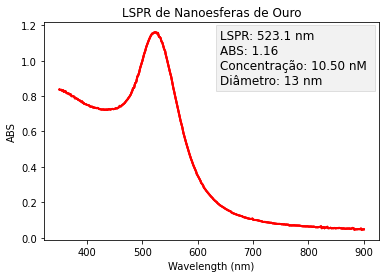

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Wavelength (nm)'], df['Avg Abs'], color='red', linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('ABS')
plt.title('LSPR de Nanoesferas de Ouro')

wavelength = round(LSPR,1)
abs_value = LSPR_ABS
concentracao = concentracao_media
diametro = round(diametro_medio)
plt.annotate(f'LSPR: {wavelength} nm \nABS: {abs_value:.2f}\nConcentração: {concentracao:.2f} nM \nDiâmetro: {diametro} nm',
             xy=(0.525, 0.718),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(facecolor='grey', alpha=0.1))

#plt.savefig('output.jpeg', dpi=300, format='jpeg')
